# Tuning Hyperparameters of Simulated Annealing Algorithm

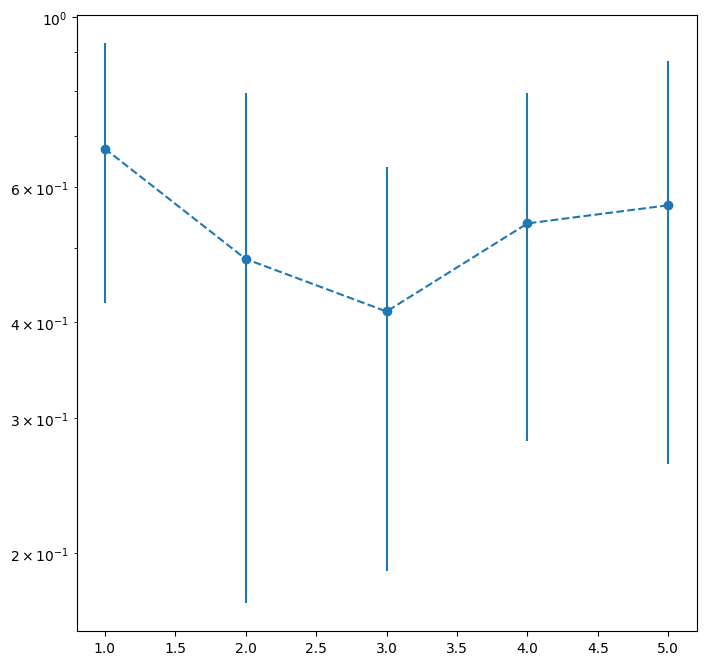

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from optimisation.optimisers import SimulatedAnnealing

# Set global parameters kept constant
n_max = 5
tau = 50e-9
pulse_length = 50
band_dig = 6
amp_dig = 1
amp_max = 1
det_max = 0.5/tau
init_temp = 100
w1_max = 2*np.pi*40e6
lambda_val = 1000


In [33]:
np.linspace(0, 10, 10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

## 